In [1]:
import pandas as pd
import datetime
import time
import requests
import io

In [2]:
df = pd.read_csv("Nabil.csv")
df = df.rename(columns={
    "Total Transactions": "TotalTransactions",
    "Total Traded Shares": "TotalTradedShares",
    "Total Traded Amount": "TotalTradedAmount",
    "Max. Price": "MaxPrice",
    "Min. Price": "MinPrice",
    "Close Price": "ClosePrice"
})

df["Open"] = df["MaxPrice"]
df["High"] = df["MaxPrice"]
df["Low"] = df["MinPrice"]
df["Close"] = df.apply(lambda row: row["MaxPrice"] if row.name % 2 == 0 else row["MinPrice"], axis=1)
df["Adj Close"] = df["MinPrice"]
df["Volume"] = df["TotalTradedAmount"]
df["Name"] = "NABIL"
df = df[["Date", "TotalTransactions", "TotalTradedShares", "TotalTradedAmount", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Name"]]
df.to_csv("Nabil1.csv", index=False)
stock_final = pd.read_csv("Nabil1.csv")
stock_final

,Date,TotalTransactions,TotalTradedShares,TotalTradedAmount,Open,High,Low,Close,Adj Close,Volume,Name
0,2021-12-29,3783,326139.0,477182107.7,1500.0,1500.0,1450.0,1500.0,1450.0,477182107.7,NABIL
1,2021-12-28,1841,170269.0,253737724.2,1500.0,1500.0,1479.2,1479.2,1479.2,253737724.2,NABIL
2,2021-12-27,2100,201767.0,306099202.3,1550.0,1550.0,1485.0,1550.0,1485.0,306099202.3,NABIL
3,2021-12-26,2197,209837.0,320749736.3,1570.8,1570.8,1506.0,1506.0,1506.0,320749736.3,NABIL
4,2021-12-23,832,51892.0,77043373.0,1499.0,1499.0,1471.0,1499.0,1471.0,77043373.0,NABIL
...,...,...,...,...,...,...,...,...,...,...,...
2644,2010-04-20,18,1212.0,2369304.0,1975.0,1975.0,1945.0,1975.0,1945.0,2369304.0,NABIL
2645,2010-04-19,18,1774.0,3549542.0,2039.0,2039.0,2000.0,2000.0,2000.0,3549542.0,NABIL
2646,2010-04-15,40,3464.0,6935470.0,2040.0,2040.0,2000.0,2040.0,2000.0,6935470.0,NABIL
2647,2010-04-15,40,3464.0,6935470.0,2040.0,2040.0,2000.0,2000.0,2000.0,6935470.0,NABIL


**Step 3:** Write the data to a csv file.

In [3]:
# stock_final = stock_final.query("Name == 'A'")
stock_final.drop(stock_final.columns[[0,1,2,3,8,10]], axis=1, inplace=True)
stock_final
stock_final.to_csv('Nabil2.csv',index = False)


In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('Nabil2.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


     Open    High     Low   Close       Volume
0  1500.0  1500.0  1450.0  1500.0  477182107.7
1  1500.0  1500.0  1479.2  1479.2  253737724.2
2  1550.0  1550.0  1485.0  1550.0  306099202.3
3  1570.8  1570.8  1506.0  1506.0  320749736.3
4  1499.0  1499.0  1471.0  1499.0   77043373.0


Open   --- mean : 1489.0661494903736   	 Std:  534.0353041318184   	 Max:  2800.0   	 Min:  667.0
High   --- mean : 1489.0661494903736   	 Std:  534.0353041318184   	 Max:  2800.0   	 Min:  667.0
Low    --- mean : 1454.531370328426   	 Std:  521.9379543084124   	 Max:  2700.0   	 Min:  594.0
Close  --- mean : 1471.809939599849   	 Std:  528.3998503364256   	 Max:  2800.0   	 Min:  660.0
Volume --- mean : 25358696.481389202   	 Std:  63160232.032622255   	 Max:  1179786179.7   	 Min:  21646.0


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [5]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item    Open   Close     Volume
0     0  2040.0  2040.0  6935470.0
1     1  2040.0  2000.0  6935470.0
2     2  2040.0  2040.0  6935470.0
3     3  2039.0  2000.0  3549542.0
4     4  1975.0  1975.0  2369304.0
---
      Item    Open   Close       Volume
2644  2644  1499.0  1499.0   77043373.0
2645  2645  1570.8  1506.0  320749736.3
2646  2646  1550.0  1550.0  306099202.3
2647  2647  1500.0  1479.2  253737724.2
2648  2648  1500.0  1500.0  477182107.7


**Step 2: ** Visualise raw data.

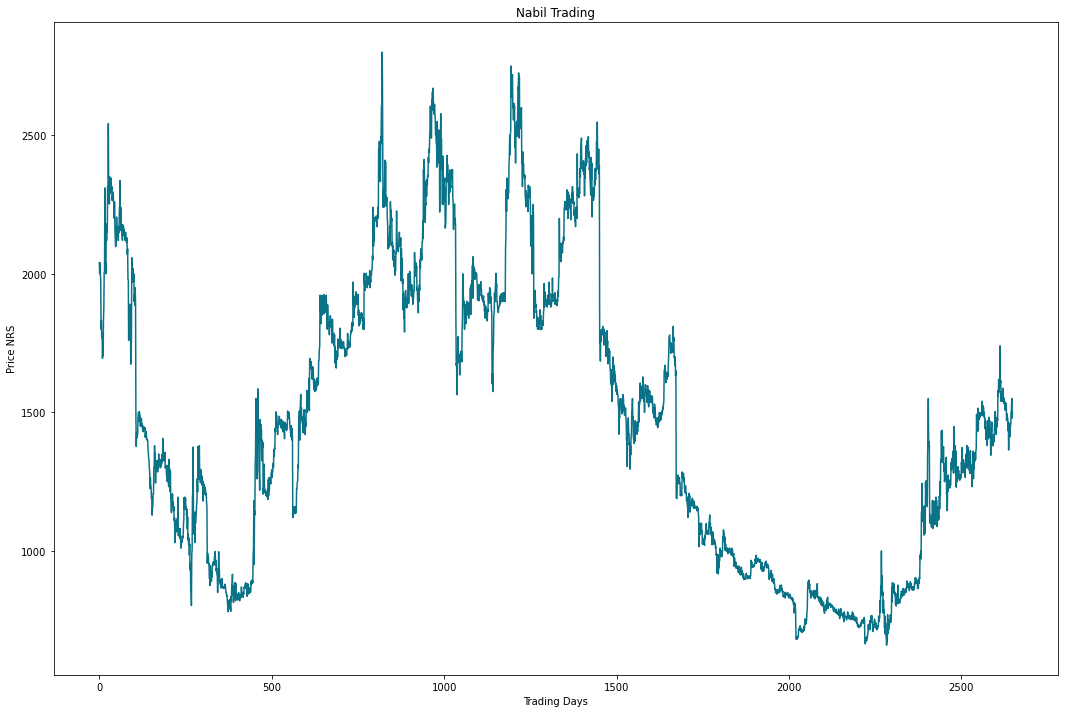

In [6]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [7]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close   Volume
0     0  0.643694  0.644860  0.00586
1     1  0.643694  0.626168  0.00586
2     2  0.643694  0.644860  0.00586
3     3  0.643226  0.626168  0.00299
4     4  0.613221  0.614486  0.00199


Open   --- mean : 0.38540372690594177   	 Std:  0.25036816883817087   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.37935043906535004   	 Std:  0.24691581791421757   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.021476362238087174   	 Std:  0.053536303413476864   	 Max:  0.9999999999999999   	 Min:  0.0


**Step 4 :** Visualize the data again

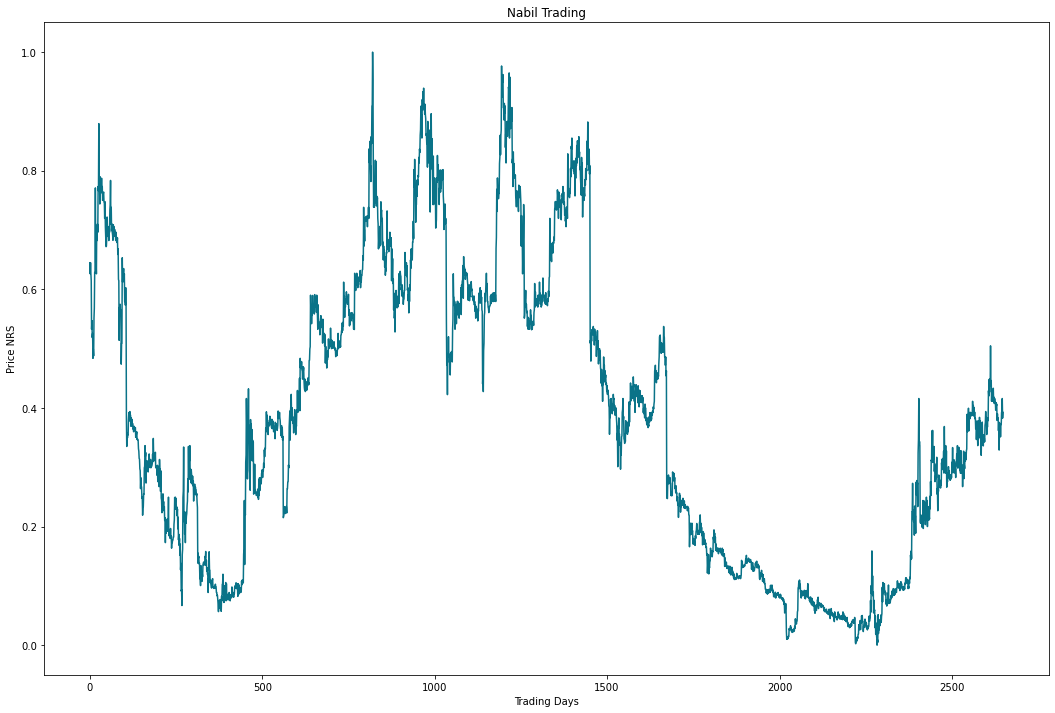

In [8]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [9]:
stocks.to_csv('Nabil_preprocessed.csv',index= False)

**Step 1:** Load the preprocessed data

In [10]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('Nabil_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.643694,0.644860,0.00586
1,1,0.643694,0.626168,0.00586
2,2,0.643694,0.644860,0.00586
3,3,0.643226,0.626168,0.00299
4,4,0.613221,0.614486,0.00199


**Step 2:** Split data into train and test pair

In [11]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1815, 1)
y_train (1815, 1)
x_test (834, 1)
y_test (834, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [12]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [13]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

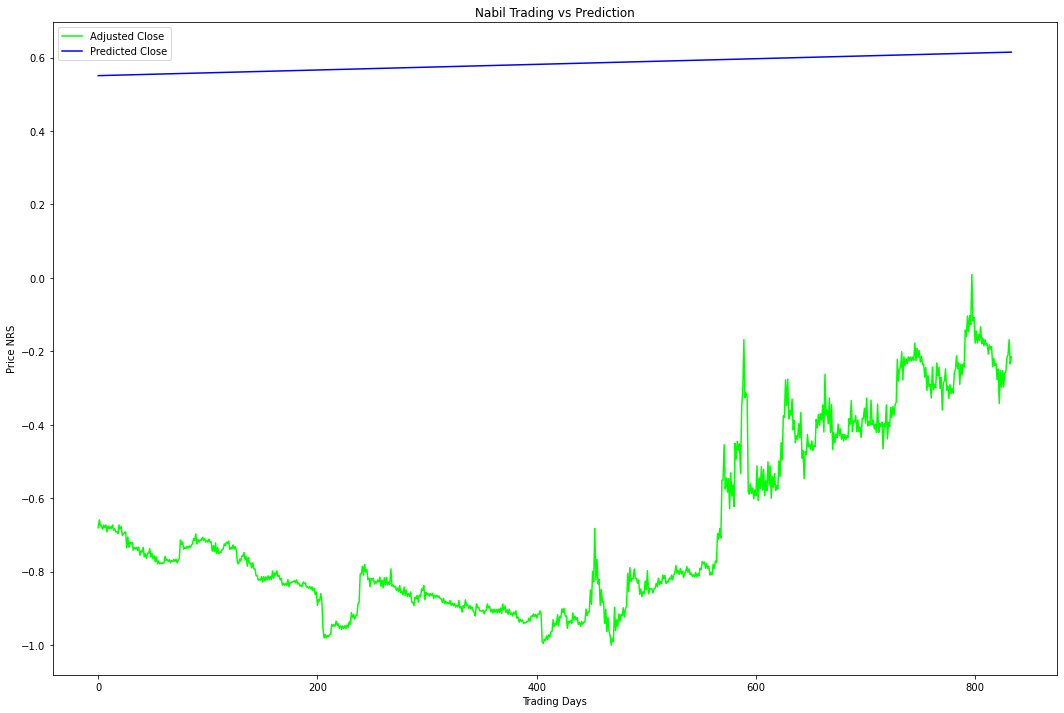

In [14]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [15]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.3669 MSE (0.6057 RMSE)
Test Score: 1.65889240 MSE (1.28797997 RMSE)


### Basic LSTM Model

import keras libraries for smooth implementaion of lstm 

In [16]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('Nabil_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

2023-02-26 20:37:47.757655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 20:37:47.925928: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-26 20:37:47.925953: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-26 20:37:48.874837: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

,Open,Close,Volume
0,0.643694,0.644860,0.00586
1,0.643694,0.626168,0.00586
2,0.643694,0.644860,0.00586
3,0.643226,0.626168,0.00299
4,0.613221,0.614486,0.00199


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [17]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2093, 50, 3)
y_train (2093,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [18]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

2023-02-26 20:37:49.593142: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-26 20:37:49.593197: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-26 20:37:49.593237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (shanks-Inspiron-3443): /proc/driver/nvidia/version does not exist
2023-02-26 20:37:49.593692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


compilation time :  0.012077569961547852


**Step 4:** Train the model

In [19]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

63/63 [==============================] - 9s 78ms/step - loss: 0.0178 - val_loss: 5.0519e-04


**Step 5:** make prediction using test data

In [20]:
predictions = model.predict(X_test)

14/14 [==============================] - 1s 18ms/step


**Step 6:** Plot the results

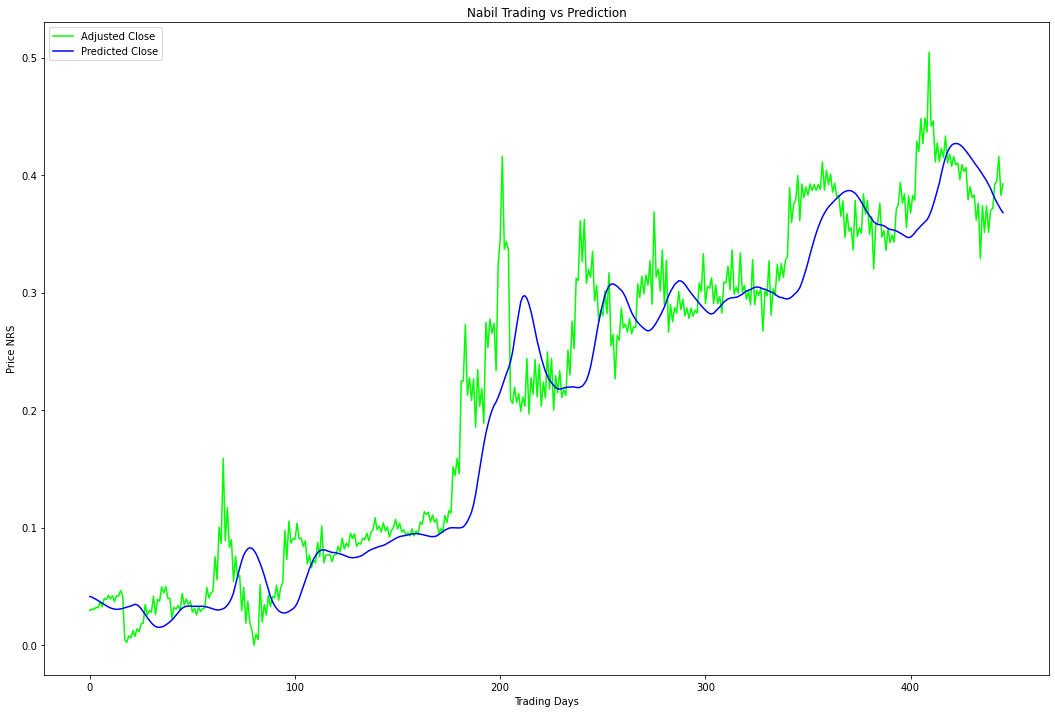

In [21]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [22]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00422384 MSE (0.06499105 RMSE)
Test Score: 0.00187549 MSE (0.04330698 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [23]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.006411552429199219


**Step 2: ** Train improved LSTM model

In [24]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
20/20 - 8s - loss: 0.0467 - val_loss: 0.0048 - 8s/epoch - 402ms/step
Epoch 2/5
20/20 - 3s - loss: 0.0074 - val_loss: 0.0013 - 3s/epoch - 146ms/step
Epoch 3/5
20/20 - 3s - loss: 0.0058 - val_loss: 4.2351e-04 - 3s/epoch - 136ms/step
Epoch 4/5
20/20 - 3s - loss: 0.0053 - val_loss: 4.1880e-04 - 3s/epoch - 127ms/step
Epoch 5/5
20/20 - 3s - loss: 0.0051 - val_loss: 4.1041e-04 - 3s/epoch - 141ms/step


**Step 3:** Make prediction on improved LSTM model

In [25]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

5/5 [==============================] - 1s 42ms/step


**Step 4:** plot the results

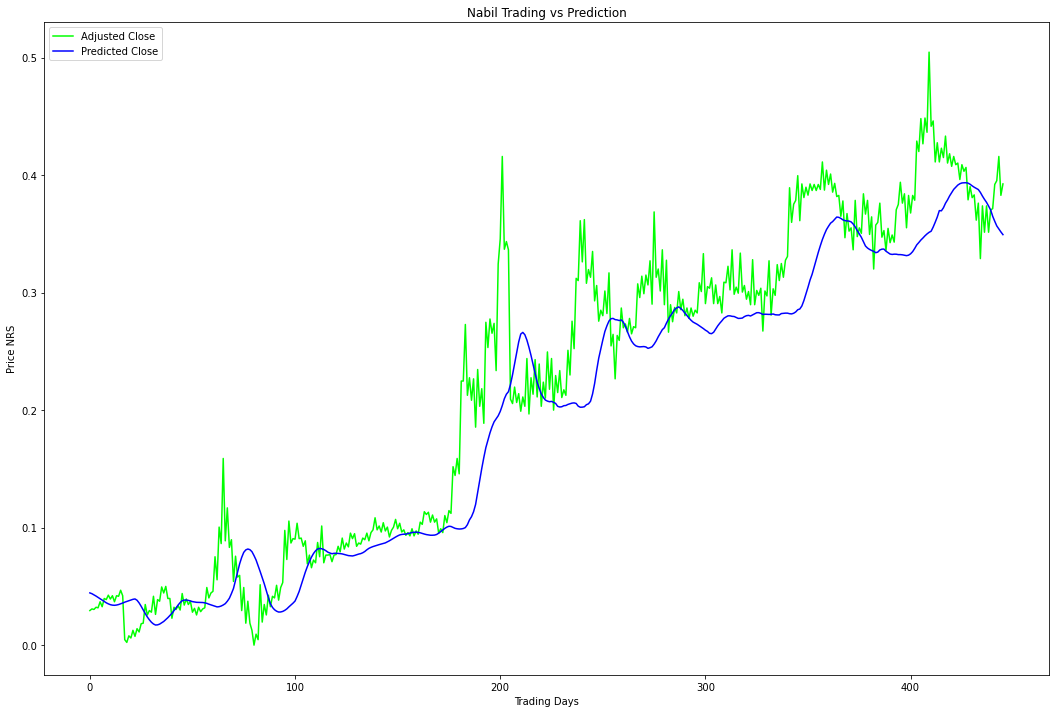

In [26]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [27]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00396612 MSE (0.06297714 RMSE)
Test Score: 0.00228245 MSE (0.04777499 RMSE)


In [28]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.002282 - RMSE * Adjusted Close Range


# Checking Robustness of the model



In [30]:
# import preprocess_data as ppd

# data = pd.read_csv('googl.csv')

# stocks = ppd.remove_data(data)

# stocks = ppd.get_normalised_data(stocks)

# stocks = stocks.drop(['Item'], axis = 1)
# #Print the dataframe head and tail
# print(stocks.head())

# X = stocks[:].as_matrix()
# Y = stocks[:]['Close'].as_matrix()

# X = sd.unroll(X,1)
# Y = Y[-X.shape[0]:]

# print(X.shape)
# print(Y.shape)

# # Generate predictions 
# predictions = model.predict(X)

# #get the test score
# testScore = model.evaluate(X, Y, verbose=0)
# print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))